Load!

In [2]:
library(tidyverse);
library(magrittr); # better handling of pipes
library(skimr);
library(knitr);

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'magrittr'


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




In [3]:
hourly_data <- "ecan_hourly/full_hourly_data/full_hourly_data.csv" %>%
    read_csv()

hourly_data %>%
    skim() %>%
    knitr::kable()

Rows: 2402339 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): council_name, airshed_name, site_name, site_type, contaminant, un...
dbl   (3): site_lat, site_long, value
dttm  (1): observation_date
date  (1): obs_date
time  (1): obs_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.




|skim_type |skim_variable     | n_missing| complete_rate|Date.min   |Date.max   |Date.median | Date.n_unique|POSIXct.min |POSIXct.max |POSIXct.median      | POSIXct.n_unique| character.min| character.max| character.empty| character.n_unique| character.whitespace|difftime.min |difftime.max |difftime.median | difftime.n_unique| numeric.mean| numeric.sd| numeric.p0| numeric.p25| numeric.p50| numeric.p75| numeric.p100|numeric.hist |
|:---------|:-----------------|---------:|-------------:|:----------|:----------|:-----------|-------------:|:-----------|:-----------|:-------------------|----------------:|-------------:|-------------:|---------------:|------------------:|--------------------:|:------------|:------------|:---------------|-----------------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|------------:|:------------|
|Date      |obs_date          |       268|     0.9998884|2013-10-01 |2023-10-01 |2018-05-07  |          3653|NA          |NA        

In [4]:
hourly_data %>%
    head()

council_name,airshed_name,site_name,site_type,site_lat,site_long,observation_date,contaminant,value,unit_of_measure,quality_code,collection_method,monitoring_device,obs_date,obs_time,weekday
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<time>,<chr>
Environment Canterbury,Ashburton,Ashburton,Residential,-43.91224,171.7552,2013-10-01 00:00:00,CO,0.2338333,mg/m3(S),QC500,AS 3580.7.1,CO_API,2013-10-01,00:00:00,Tuesday
Environment Canterbury,Ashburton,Ashburton,Residential,-43.91224,171.7552,2013-10-01 01:00:00,CO,0.2493333,mg/m3(S),QC500,AS 3580.7.1,CO_API,2013-10-01,01:00:00,Tuesday
Environment Canterbury,Ashburton,Ashburton,Residential,-43.91224,171.7552,2013-10-01 02:00:00,CO,0.2476667,mg/m3(S),QC500,AS 3580.7.1,CO_API,2013-10-01,02:00:00,Tuesday
Environment Canterbury,Ashburton,Ashburton,Residential,-43.91224,171.7552,2013-10-01 03:00:00,CO,0.2683333,mg/m3(S),QC500,AS 3580.7.1,CO_API,2013-10-01,03:00:00,Tuesday
Environment Canterbury,Ashburton,Ashburton,Residential,-43.91224,171.7552,2013-10-01 04:00:00,CO,0.2483333,mg/m3(S),QC500,AS 3580.7.1,CO_API,2013-10-01,04:00:00,Tuesday
Environment Canterbury,Ashburton,Ashburton,Residential,-43.91224,171.7552,2013-10-01 05:00:00,CO,0.2676667,mg/m3(S),QC500,AS 3580.7.1,CO_API,2013-10-01,05:00:00,Tuesday


In [5]:
hourly_location <- hourly_data %>%
    group_by(site_name, contaminant, obs_time, obs_date) %>%
    summarise(avg = mean(value))
    

`summarise()` has grouped output by 'site_name', 'contaminant', 'obs_time'. You
can override using the `.groups` argument.


In [6]:
hourly_data %>%
    distinct(site_name,site_lat, site_long)

site_name,site_lat,site_long
<chr>,<dbl>,<dbl>
Ashburton,-43.91224,171.7552
Geraldine,-44.10018,171.2415
Kaiapoi,-43.38464,172.6520
Rangiora,-43.30754,172.5953
Riccarton Road,-43.52975,172.5987
St Albans,-43.51126,172.6337
St Albans EP,-43.50857,172.6359
St Albans EP,-43.50857,172.6300
Timaru Anzac Square,-44.40448,171.2497


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 12 rows containing non-finite values (`stat_smooth()`)."


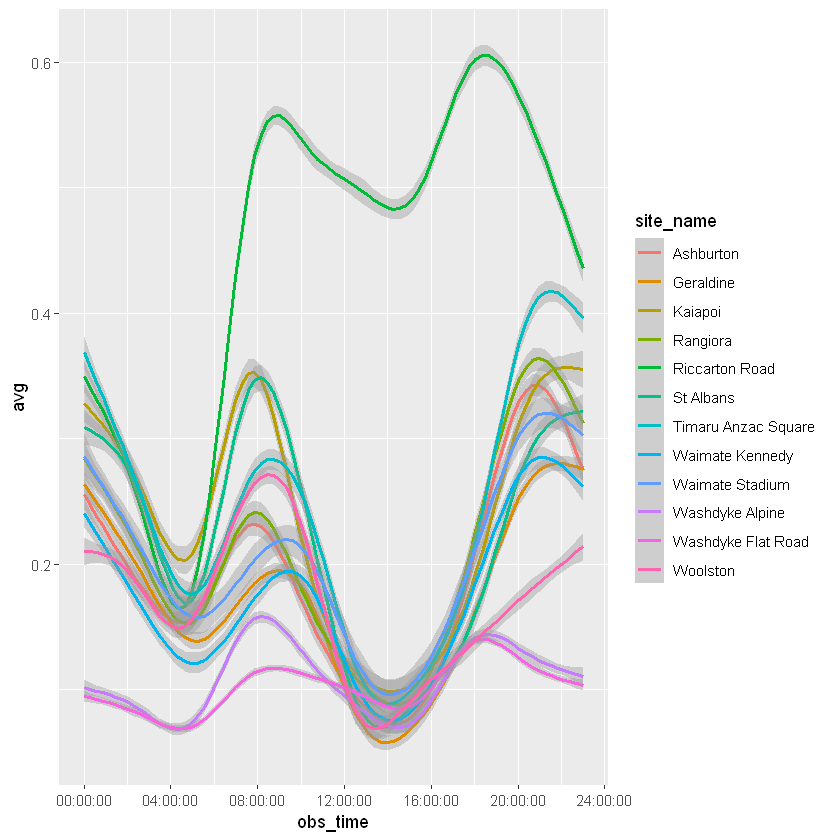

In [7]:
hourly_location %>% 
    filter(contaminant == "CO") %>%
    ggplot(aes(x = obs_time, y = avg)) + 
    geom_smooth(aes(color=site_name))

In [43]:
traffic_data <- "Traffic/L5473 SP-2020-09-17T00_00_00-189.csv" %>%
    read_csv()

traffic_data %>%
    skim() %>%
    knitr::kable()

Rows: 24 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (10): Mon, Tue, Wed, Thu, Fri, Sat, Sun, Weekday, Weekend, All Days
time  (1): Hour

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.




|skim_type |skim_variable | n_missing| complete_rate|difftime.min |difftime.max |difftime.median | difftime.n_unique| numeric.mean| numeric.sd| numeric.p0| numeric.p25| numeric.p50| numeric.p75| numeric.p100|numeric.hist |
|:---------|:-------------|---------:|-------------:|:------------|:------------|:---------------|-----------------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|------------:|:------------|
|difftime  |Hour          |         0|             1|0 secs       |82800 secs   |41400 secs      |                24|           NA|         NA|         NA|          NA|          NA|          NA|           NA|NA           |
|numeric   |Mon           |         0|             1|NA secs      |NA secs      |NA secs         |                NA|     709.1250|   465.3794|         36|      214.25|       861.0|     1133.50|         1231|▆▂▂▂▇        |
|numeric   |Tue           |         0|             1|NA secs      |NA secs      |NA secs         |        

Rows: 24 Columns: 11


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (10): Mon, Tue, Wed, Thu, Fri, Sat, Sun, Weekday, Weekend, All Days
time  (1): Hour

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


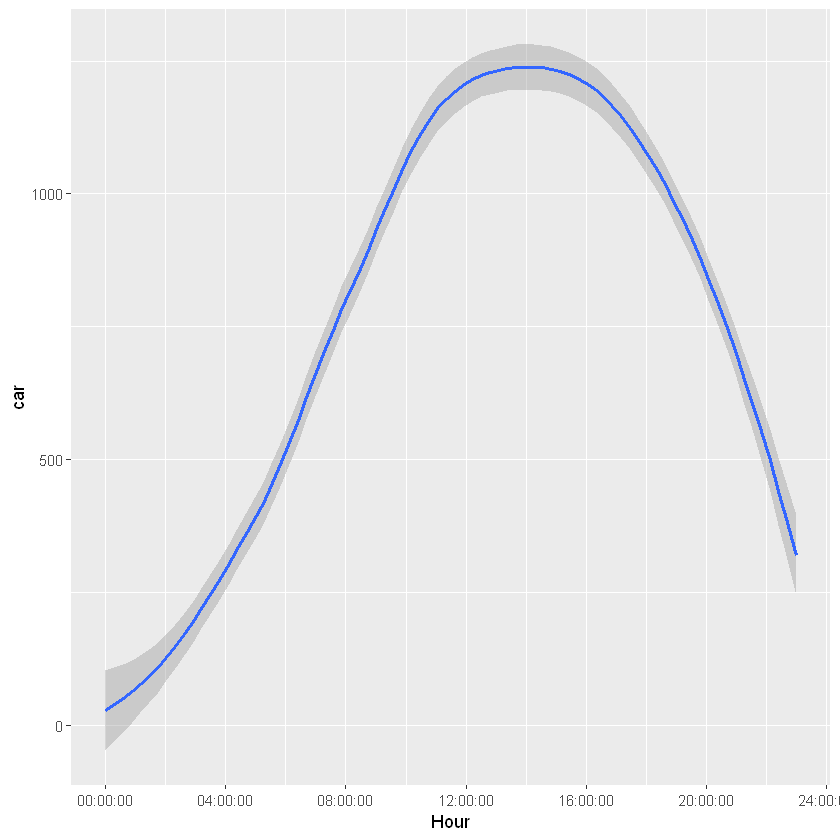

In [50]:
traffic_data <- "Traffic/L5473 SP-2020-09-17T00_00_00-189.csv" %>%
    read_csv()

traffic_data %<>%
    select(Hour:Sun) %>%
    gather(key='weekday',value='car', Mon, Tue, Wed, Thu, Fri, Sat, Sun)

traffic_data %>%
    ggplot(aes(x=Hour, y=car)) +
    geom_smooth()

L0091